In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bitcoin_df = pd.read_csv('D:/python3/data/market_price.csv')#, names=['ds','y'])
# bitcoin_df = bitcoin_df.drop([0])
bitcoin_df.columns=['ds','y']
bitcoin_df.head()

,ds,y
0,2021-03-13 00:00:00,57253.28
1,2021-03-14 00:00:00,61258.73
2,2021-03-15 00:00:00,59133.47
3,2021-03-16 00:00:00,55754.72
4,2021-03-17 00:00:00,56872.38


In [3]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
ds    61 non-null object
y     61 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [4]:
# bitcoin_df['y'] = bitcoin_df['y'].astype(float)
# bitcoin_df.info()

In [5]:
bitcoin_df.tail()

,ds,y
56,2021-05-08 00:00:00,57380.27
57,2021-05-09 00:00:00,58928.81
58,2021-05-10 00:00:00,58280.73
59,2021-05-11 00:00:00,55883.50
60,2021-05-12 00:00:00,56750.00


In [6]:
# bitcoin_df['ds'] = pd.to_datetime(bitcoin_df['ds'])
# bitcoin_df.head()

In [7]:
bitcoin_df1 = bitcoin_df[:-5]
# bitcoin_df1.tail()
bitcoin_df2 = bitcoin_df[-5:]
bitcoin_df2

,ds,y
56,2021-05-08 00:00:00,57380.27
57,2021-05-09 00:00:00,58928.81
58,2021-05-10 00:00:00,58280.73
59,2021-05-11 00:00:00,55883.50
60,2021-05-12 00:00:00,56750.00


In [8]:
# day 피처를 index로 설정
bitcoin_df1.index = bitcoin_df1['ds']
bitcoin_df1.set_index('ds', inplace=True)
bitcoin_df1.head()

,y
ds,
2021-03-13 00:00:00,57253.28
2021-03-14 00:00:00,61258.73
2021-03-15 00:00:00,59133.47
2021-03-16 00:00:00,55754.72
2021-03-17 00:00:00,56872.38


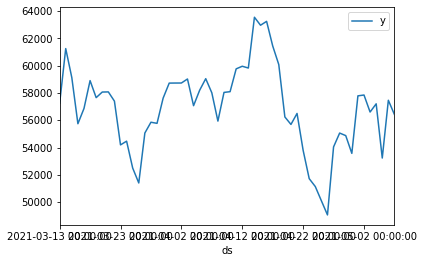

In [9]:
bitcoin_df1.plot()
plt.show()

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(bitcoin_df1, order=(2, 1, 2))

model_fit = model.fit(trend='c', disp=True, full_output=True)

model_fit.summary()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   55
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -492.855
Method:                       css-mle   S.D. of innovations           1818.811
Date:                Wed, 12 May 2021   AIC                            997.709
Time:                        12:44:31   BIC                           1009.753
Sample:                    03-14-2021   HQIC                          1002.367
                         - 05-07-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.2655    253.050     -0.155      0.877    -535.234     456.703
ar.L1.D.y     -0.8422      0.037    -22.578      0.000      -0.915      -0.769
ar.L2.D.y     -0.9868      0.031    -31.886      0.000      -1.047      -0.926
ma.L1.D.y      0.9169      0.090     10.235      0.000       0.741       1.092
ma.L2.D.y      1.0000      0.073     13.714      0.000       0.857       1.143
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4267           -0.9118j            1.0067           -0.3197
AR.2           -0.4267           +0.9118j            1.0067            0.3197
MA.1           -0.4584           -0.8887j            1.0000           -0.3258
MA.2           -0.4584           +0.8887j            1.0000            0.3258
-----------------------------------------------------------------------------
"""

In [11]:
from pmdarima.arima import auto_arima

model_arima = auto_arima(bitcoin_df1, trace=True, error_action='ignore',
                         start_p=1, start_q=1, max_p=3, max_q=3, 
                         suppress_warnings=True, stepwise=False, seasonal=False)

model_arima.fit(bitcoin_df1)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1387.382, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1255.057, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1342.734, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1022.916, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1024.772, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1025.556, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1025.114, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1027.554, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1025.164, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]    

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
model = ARIMA(bitcoin_df1, order=(1, 0, 1))
model_fit = model.fit(trend='c', disp=True, full_output=True)
model_fit.summary()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:                     ARMA(1, 1)   Log Likelihood                -502.368
Method:                       css-mle   S.D. of innovations           1888.835
Date:                Wed, 12 May 2021   AIC                           1012.736
Time:                        12:44:33   BIC                           1020.838
Sample:                    03-13-2021   HQIC                          1015.877
                         - 05-07-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.689e+04   1062.172     53.559      0.000    5.48e+04     5.9e+04
ar.L1.y        0.7760      0.105      7.423      0.000       0.571       0.981
ma.L1.y       -0.0019      0.178     -0.010      0.992      -0.351       0.347
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2886           +0.0000j            1.2886            0.0000
MA.1          539.5610           +0.0000j          539.5610            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
residuals.head()

,0
ds,
2021-03-13 00:00:00,363.982933
2021-03-14 00:00:00,4087.241479
2021-03-15 00:00:00,-1139.049697
2021-03-16 00:00:00,-2878.226825
2021-03-17 00:00:00,858.210934


In [29]:
residuals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 2021-03-13 00:00:00 to 2021-05-07 00:00:00
Data columns (total 1 columns):
0    56 non-null float64
dtypes: float64(1)
memory usage: 896.0+ bytes


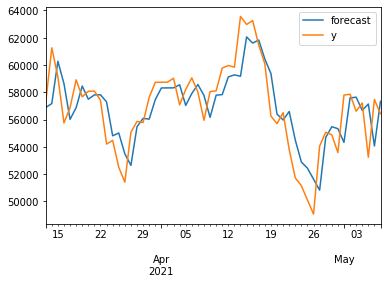

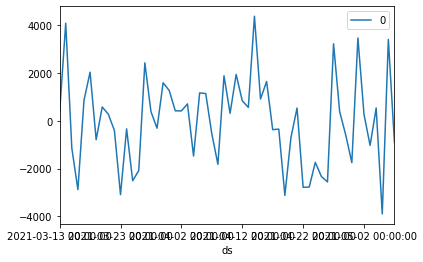

In [13]:
fig = model_fit.plot_predict()

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [15]:
forecast_data = model_fit.forecast(steps=5)

bitcoin_test_df = bitcoin_df2
bitcoin_test_df

,ds,y
56,2021-05-08 00:00:00,57380.27
57,2021-05-09 00:00:00,58928.81
58,2021-05-10 00:00:00,58280.73
59,2021-05-11 00:00:00,55883.50
60,2021-05-12 00:00:00,56750.00


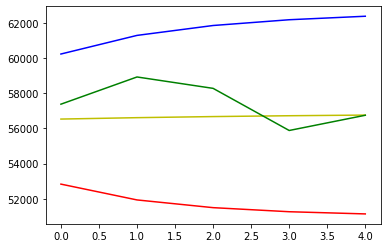

In [16]:
pred_y = forecast_data[0].tolist()
test_y = bitcoin_test_df.y.values

pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color='y')
plt.plot(pred_y_lower, color='r')
plt.plot(pred_y_upper, color='b')
plt.plot(test_y, color='g')

plt.show()

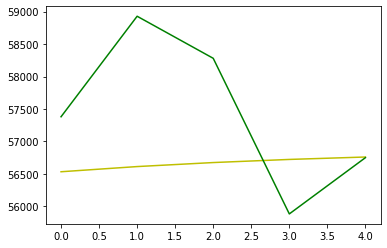

In [17]:
plt.plot(pred_y, color='y')  # 예측
plt.plot(test_y, color='g')  # 실제
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# RMSE : 모델의 예측값과 실제값의 차이를 하나의 숫자로 표현
# rmse2 = mean_squared_error(test_y, pred_y)**0.5
rmse = sqrt(mean_squared_error(pred_y, test_y))
rmse

22136.073104668878

In [19]:
bitcoin_df1 = bitcoin_df[:-5]

In [20]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

# 모델 학습
prophet.fit(bitcoin_df1)

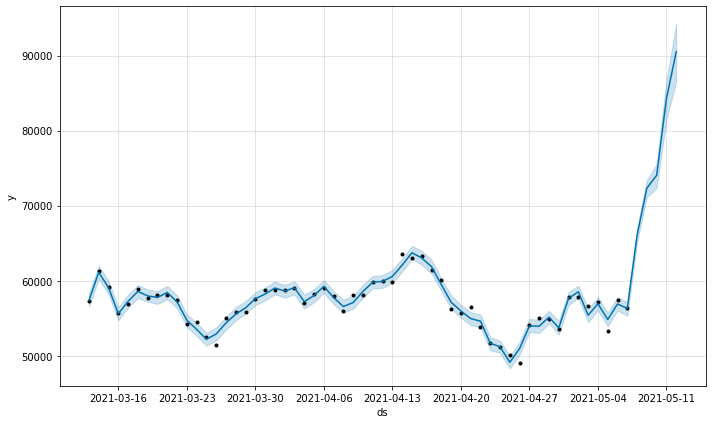

In [21]:
# 5일을 내다보며 예측하는 작업
future_data = prophet.make_future_dataframe(periods=5, freq='d')
# periods=5 : 5일뒤 -> '일'단위 간격,,, freq='d' : 연속 -> ARIMA의 I부분 (차분 Differencing)

forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = prophet.plot(forecast_data)

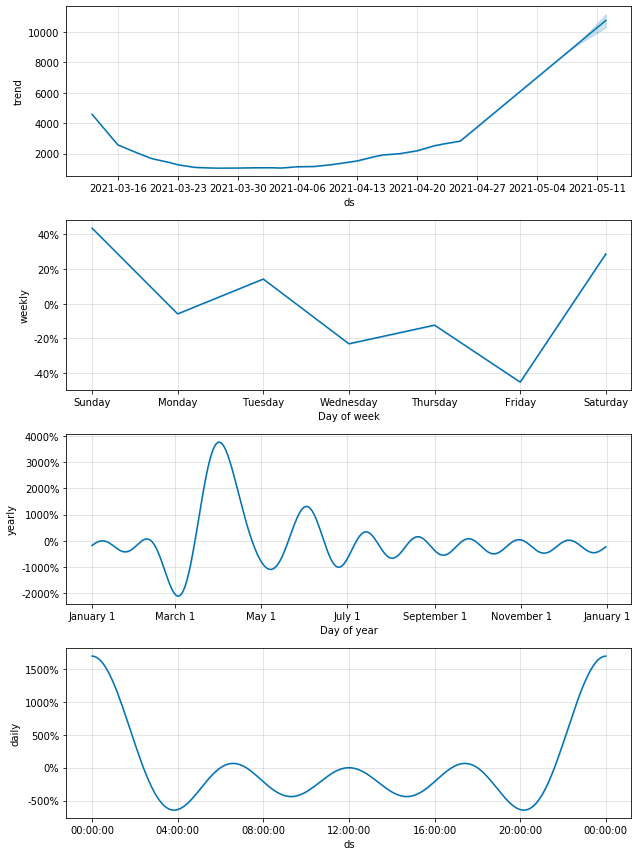

In [22]:
fig2 = prophet.plot_components(forecast_data)

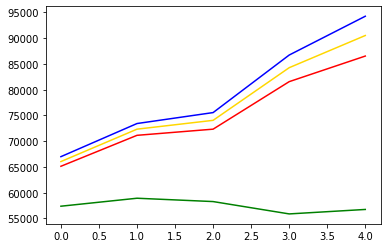

In [23]:
bitcoin_test_df = bitcoin_df2

pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color='gold')
plt.plot(pred_y_lower, color='r')
plt.plot(pred_y_upper, color='b')
plt.plot(test_y, color='g')

plt.show()

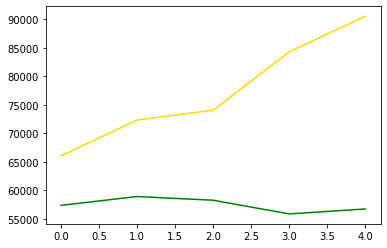

In [24]:
plt.plot(pred_y, color='gold')  # 예측
plt.plot(test_y, color='g')     # 실제

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)   # 설명력을 나타냄
print(rmse)
print(r2)

NameError: name 'y' is not defined